In [1]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving 2023-1.parquet to 2023-1.parquet


In [4]:
first_file = list(uploaded.keys())[0]

In [5]:
print(f"Uploaded file: {first_file}")

Uploaded file: 2023-1.parquet


In [6]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet(first_file)

# Sample 5% of the data
sample_df = df.sample(frac=0.05, random_state=42)

# Preview the sampled data
sample_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
323412          1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1491266         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2385670         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
766545          2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
980153          1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
323412            1.90         1.0                  N           239   
1491266           1.86         1.0                  N           239   
2385670           0.50         1.0                  N           162   
766545            2.56         1.0                  N           162   
980153            2.80         1.0                  N           164   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
323412            236             1         13.5    2.5      0.5        2.50   
1491266           162             1         14.2    0.0      0.5        3.64   
2385670           170             1          5.1    1.0      0.5        2.02   
766545            262             1         17.0    2.5      0.5        4.70   
980153            231             1         14.9    3.5      0.5        3.98   

         tolls_amount  improvement_surcharge  total_amount  \
323412            0.0                    1.0         20.00   
1491266           0.0                    1.0         21.84   
2385670           0.0                    1.0         12.12   
766545            0.0                    1.0         28.20   
980153            0.0                    1.0         23.88   

         congestion_surcharge  airport_fee  
323412                    2.5          0.0  
1491266                   2.5          0.0  
2385670                   2.5          0.0  
766545                    2.5          0.0  
980153                    2.5          0.0

In [7]:
sample_df.to_parquet('sampled_hour_data.parquet', index=False)

In [11]:
from google.colab import files

uploaded_files = files.upload()

Saving 2023-11.parquet to 2023-11.parquet
Saving 2023-4.parquet to 2023-4.parquet
Saving 2023-12.parquet to 2023-12.parquet
Saving 2023-3.parquet to 2023-3.parquet
Saving 2023-10.parquet to 2023-10.parquet
Saving 2023-7.parquet to 2023-7.parquet
Saving 2023-8.parquet to 2023-8.parquet
Saving 2023-2.parquet to 2023-2.parquet
Saving 2023-6.parquet to 2023-6.parquet
Saving 2023-5.parquet to 2023-5.parquet
Saving 2023-9.parquet to 2023-9.parquet


In [12]:
ll_samples = [sample_df]

for filename in uploaded_files.keys():
    df = pd.read_parquet(filename)
    sample = df.sample(frac=0.05, random_state=42)
    all_samples.append(sample)

# Combine all samples
combined_sample_df = pd.concat(all_samples, ignore_index=True)

In [13]:
# Preview combined sample
combined_sample_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3         2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4         1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.90         1.0                  N           239           236   
1           1.86         1.0                  N           239           162   
2           0.50         1.0                  N           162           170   
3           2.56         1.0                  N           162           262   
4           2.80         1.0                  N           164           231   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         13.5    2.5      0.5        2.50           0.0   
1             1         14.2    0.0      0.5        3.64           0.0   
2             1          5.1    1.0      0.5        2.02           0.0   
3             1         17.0    2.5      0.5        4.70           0.0   
4             1         14.9    3.5      0.5        3.98           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         20.00                   2.5          0.0   
1                    1.0         21.84                   2.5          0.0   
2                    1.0         12.12                   2.5          0.0   
3                    1.0         28.20                   2.5          0.0   
4                    1.0         23.88                   2.5          0.0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [14]:
# Saving as a single Parquet file
combined_sample_df.to_parquet('combined_sample_all.parquet', index=False)

# Download
files.download('combined_sample_all.parquet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# 📦 1. DATA PREPARATION
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For geospatial mapping
import geopandas as gpd
import plotly.express as px

# Upload and load the dataset
from google.colab import files
uploaded = files.upload()
# Load dataset
df = pd.read_parquet('combined_sample_all.parquet')
print("Initial shape:", df.shape)
df.head()



Saving combined_sample_all.parquet to combined_sample_all.parquet


In [4]:
file_path = "/content/combined_sample_all.parquet"
df = pd.read_parquet(file_path)

In [5]:
df = df.sample(n=250_000, random_state=42).reset_index(drop=True)

In [8]:
 ##2. DATA CLEANING
print(df.head())
print(df.info())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-12-27 16:58:37   2023-12-27 17:29:04              2.0   
1         2  2023-11-25 01:14:59   2023-11-25 01:27:34              1.0   
2         2  2023-01-27 12:45:56   2023-01-27 13:00:13              1.0   
3         2  2023-02-28 13:36:49   2023-02-28 13:59:25              6.0   
4         1  2023-07-13 23:15:29   2023-07-13 23:23:23              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           5.90         1.0                  N            68           255   
1           3.20         1.0                  N            80            49   
2           2.09         1.0                  N           140           142   
3           3.35         1.0                  N           229           151   
4           1.50         1.0                  N           170           229   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


In [9]:
##2.1.1 Fix index and drop unnecessary columns

df.drop(columns=['index'], errors='ignore', inplace=True)

In [11]:
##2.1.2 Combine two airport fee columns if both exist

airport_cols = [col for col in df.columns if 'airport_fee' in col.lower()]

if len(airport_cols) == 2:
    df['airport_fee'] = df[airport_cols].sum(axis=1)
    df.drop(columns=airport_cols, inplace=True)

In [12]:
# 2.1.3 Check negative monetary values

monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']
negatives = df[df['fare_amount'] < 0]
print("Negative Fare - RatecodeID Counts:\n", negatives['RatecodeID'].value_counts())

Negative Fare - RatecodeID Counts:
 Series([], Name: count, dtype: int64)


In [13]:
# Display all negative values across monetary columns

for col in monetary_cols:
    print(f"Negative values in {col}: {df[df[col] < 0].shape[0]}")

Negative values in fare_amount: 0
Negative values in extra: 1
Negative values in mta_tax: 9
Negative values in tip_amount: 0
Negative values in tolls_amount: 0
Negative values in total_amount: 9


In [14]:
# Drop rows with clearly invalid negative fares

df = df[df['fare_amount'] >= 0]

In [15]:
### 2.2 Handling Missing Values

# 2.2.1 Missing values proportion
print("Missing Value Proportion:\n", df.isna().mean().sort_values(ascending=False))

Missing Value Proportion:
 RatecodeID               0.034656
passenger_count          0.034656
store_and_fwd_flag       0.034656
congestion_surcharge     0.034656
tpep_pickup_datetime     0.000000
VendorID                 0.000000
trip_distance            0.000000
PULocationID             0.000000
DOLocationID             0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
fare_amount              0.000000
mta_tax                  0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
dtype: float64


In [16]:
# 2.2.2 Handle passenger_count

print(df[df['passenger_count'].isna()])
df['passenger_count'].fillna(1, inplace=True)
df.loc[df['passenger_count'] == 0, 'passenger_count'] = 1


        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5              2  2023-10-08 02:02:00   2023-10-08 02:11:00              NaN   
67             1  2023-11-16 10:29:43   2023-11-16 10:48:46              NaN   
79             2  2023-06-01 18:11:00   2023-06-01 18:29:00              NaN   
105            1  2023-11-01 18:10:14   2023-11-01 18:21:44              NaN   
125            2  2023-10-19 23:51:44   2023-10-20 00:14:25              NaN   
...          ...                  ...                   ...              ...   
249815         2  2023-12-07 18:29:17   2023-12-07 18:39:46              NaN   
249841         1  2023-11-17 15:47:02   2023-11-17 17:22:07              NaN   
249842         1  2023-08-30 12:40:21   2023-08-30 12:58:50              NaN   
249861         2  2023-06-29 09:10:14   2023-06-29 09:37:17              NaN   
249915         2  2023-07-11 18:16:52   2023-07-11 18:27:55              NaN   

        trip_distance  RatecodeID store

<ipython-input-16-b9581384cbf2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(1, inplace=True)


In [17]:
# 2.2.3 Handle missing RatecodeID

df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)

<ipython-input-17-4f58aee770aa>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


In [18]:
# 2.2.4 Handle congestion_surcharge

df['congestion_surcharge'].fillna(0, inplace=True)

<ipython-input-18-7629306c2f74>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(0, inplace=True)


In [19]:
# 2.2.5 Handle remaining NaNs

df.fillna(0, inplace=True)

In [20]:
# 2.3 Handling Outliers

# 2.3.1 Describe and check for outliers
print(df.describe())

           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  250000.00000                      250000                      250000   
mean        1.73636  2023-07-02 19:31:00.158131  2023-07-02 19:48:31.447752   
min         1.00000         2023-01-01 00:06:17         2023-01-01 00:10:43   
25%         1.00000  2023-04-02 13:06:35.750000  2023-04-02 13:21:56.750000   
50%         2.00000         2023-06-27 13:37:13         2023-06-27 14:04:37   
75%         2.00000  2023-10-06 15:57:11.500000  2023-10-06 16:24:37.750000   
max         6.00000         2023-12-31 23:58:02         2024-01-01 00:25:41   
std         0.44629                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    250000.000000  250000.000000  250000.000000  250000.000000   
mean          1.372196       4.008790       1.622996     165.250720   
min           1.000000       0.000000       1.000000       1.000000   
25% 

In [21]:
# 2.3.2 Fix specific outliers

df = df[~((df['trip_distance'] < 0.01) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]

In [22]:

# 3. EXPLORATORY DATA ANALYSIS (EDA)

# 3.1.1 Classify columns

cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [23]:
# 3.1.2 Pickup Time Analysis

df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month

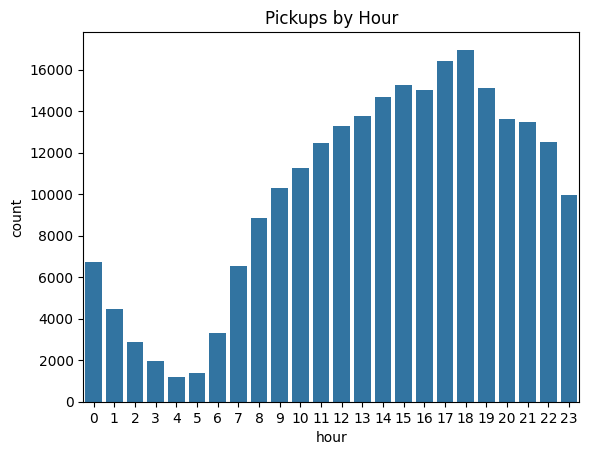

In [24]:
sns.countplot(x='hour', data=df)
plt.title('Pickups by Hour')
plt.show()

In [26]:
# 3.1.3 Filter negative/zero fares

df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0) & (df['tip_amount'] >= 0)]

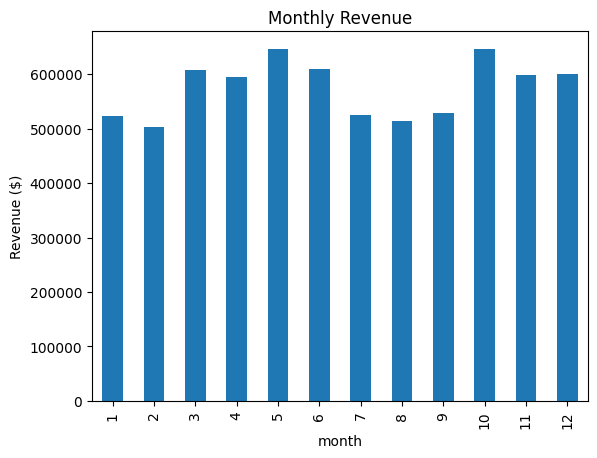

In [27]:
# 3.1.4 Monthly revenue

monthly_revenue = df.groupby('month')['total_amount'].sum()
monthly_revenue.plot(kind='bar', title='Monthly Revenue')
plt.ylabel("Revenue ($)")
plt.show()

In [28]:
# 3.1.5 Quarterly revenue share

df['quarter'] = df['pickup_datetime'].dt.quarter
quarter_revenue = df.groupby('quarter')['total_amount'].sum()
quarter_revenue_pct = 100 * quarter_revenue / quarter_revenue.sum()
print(quarter_revenue_pct)

quarter
1    23.690617
2    26.845390
3    22.714894
4    26.749099
Name: total_amount, dtype: float64


In [29]:
# 3.1.6 Distance vs Fare

sns.scatterplot(x='trip_distance', y='fare_amount', data=df.sample(10000))
plt.title('Distance vs Fare')
plt.show()

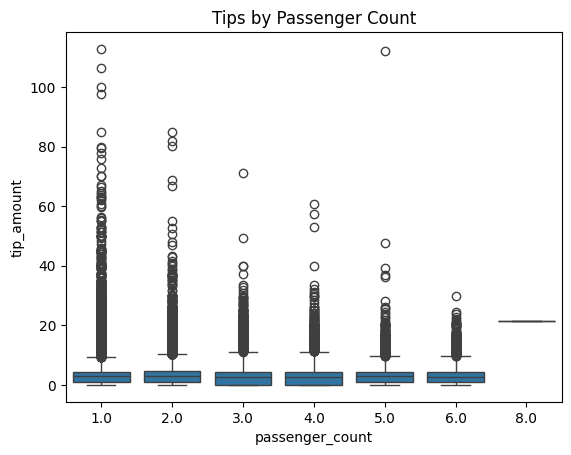

In [30]:
# 3.1.7 Fare/Tips vs Trips/Passengers

sns.boxplot(x='passenger_count', y='tip_amount', data=df)
plt.title('Tips by Passenger Count')
plt.show()

In [31]:
# 3.1.8 Payment Types

sns.countplot(x='payment_type', data=df)
plt.title("Distribution of Payment Types")
plt.show()

In [52]:
# 3.1.9 - 3.1.13 Zone Map and Trip Heatmap

import geopandas as gpd
import folium
from folium.plugins import HeatMap

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

In [48]:
from google.colab import files

uploaded = files.upload()


Saving taxi_zones.dbf to taxi_zones.dbf
Saving taxi_zones.prj to taxi_zones.prj
Saving taxi_zones.sbn to taxi_zones.sbn
Saving taxi_zones.sbx to taxi_zones.sbx
Saving taxi_zones.shp to taxi_zones.shp
Saving taxi_zones.shp.xml to taxi_zones.shp.xml
Saving taxi_zones.shx to taxi_zones.shx


In [53]:
shapefile_path = "/content/taxi_zones.shp"

In [55]:
# 🔹 Load shapefile using GeoPandas
zone_gdf = gpd.read_file(shapefile_path)

In [68]:
# Rename for clarity

zone_gdf = zone_gdf.rename(columns={'LocationID': 'PULocationID'})

In [69]:
# Count trips per pickup location

zone_trip_counts = df['PULocationID'].value_counts().reset_index()
zone_trip_counts.columns = ['PULocationID', 'trip_count']

In [71]:
# df is your main trip dataset and contains 'PULocationID'

zone_trip_counts = df['PULocationID'].value_counts().reset_index()
zone_trip_counts.columns = ['PULocationID', 'trip_count']

In [72]:
#  both columns are same dtype (important for merge to succeed)

zone_trip_counts['PULocationID'] = zone_trip_counts['PULocationID'].astype(int)
zone_gdf['PULocationID'] = zone_gdf['PULocationID'].astype(int)

In [73]:
# Merge trip counts into the GeoDataFrame

zone_gdf = zone_gdf.merge(zone_trip_counts, on='PULocationID', how='left')

# Replace missing values with 0

zone_gdf['trip_count'] = zone_gdf['trip_count'].fillna(0)

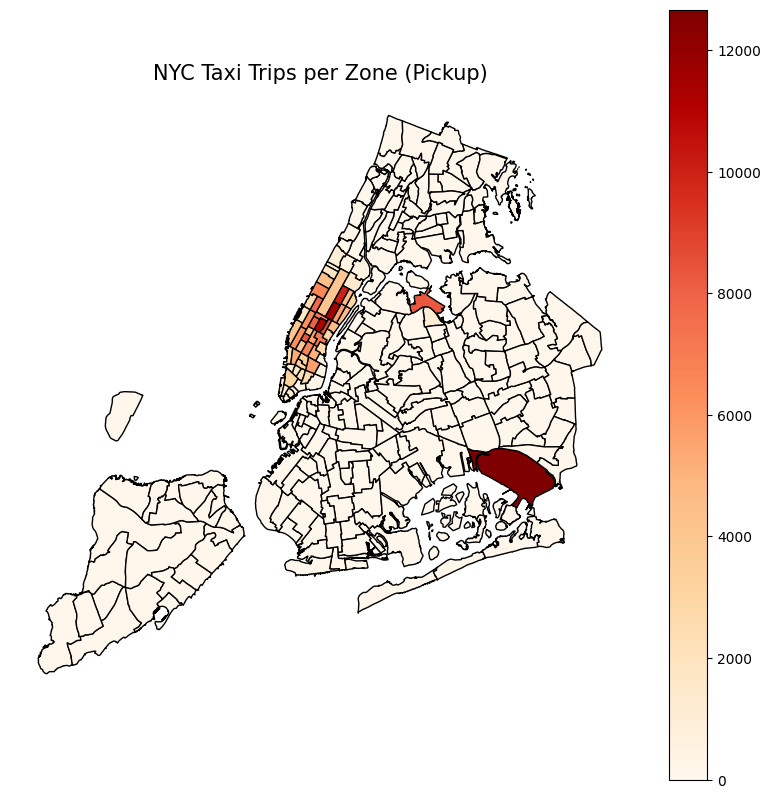

In [74]:
# Static Choropleth Map

zone_gdf.plot(column='trip_count', cmap='OrRd', legend=True, figsize=(10, 10), edgecolor='black')
plt.title('NYC Taxi Trips per Zone (Pickup)', fontsize=15)
plt.axis('off')
plt.show()

In [75]:
# Interactive Folium Map
# Get centroid coordinates

zone_gdf['centroid'] = zone_gdf.geometry.centroid
zone_gdf['lat'] = zone_gdf.centroid.y
zone_gdf['lon'] = zone_gdf.centroid.x

In [76]:
# Initialize map centered on NYC

nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

In [78]:
#  Add labels

for _, row in zone_gdf.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['zone']} ({int(row['trip_count'])} trips)"
    ).add_to(nyc_map)



In [79]:
# Show map
nyc_map

In [56]:
# 🔹 Check basic structure
print(zone_gdf.head())
print(zone_gdf.columns)

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [33]:
# 3.2 DETAILED EDA

# 3.2.1 Identify slow routes
df['trip_duration'] = (pd.to_datetime(df['tpep_dropoff_datetime']) - df['pickup_datetime']).dt.total_seconds() / 60
df['avg_speed_mph'] = df['trip_distance'] / (df['trip_duration'] / 60)
slow_routes = df[df['avg_speed_mph'] < 5]


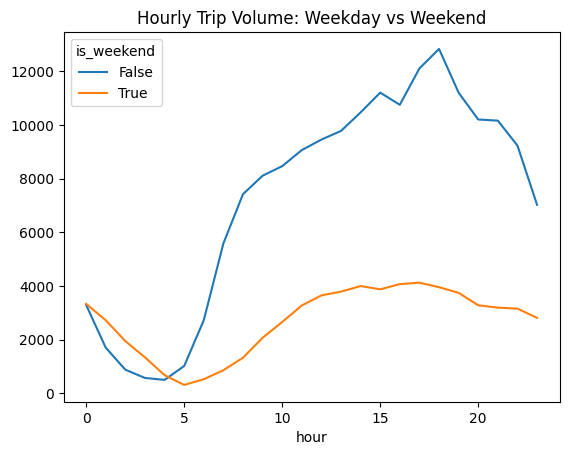

In [34]:
# 3.2.2-3.2.4 Hourly and weekday/weekend patterns

df['is_weekend'] = df['pickup_datetime'].dt.dayofweek >= 5
hourly = df.groupby(['hour', 'is_weekend']).size().unstack()
hourly.plot()
plt.title('Hourly Trip Volume: Weekday vs Weekend')
plt.show()


In [35]:
# 3.2.5-3.2.7 Top zones and night traffic

pickup_counts = df['PULocationID'].value_counts().head(10)
dropoff_counts = df['DOLocationID'].value_counts().head(10)

In [36]:
df['is_night'] = df['hour'].between(0, 5)
night_revenue = df[df['is_night']]['total_amount'].sum()
day_revenue = df[~df['is_night']]['total_amount'].sum()
print("Night vs Day Revenue Ratio:", night_revenue / (night_revenue + day_revenue))

Night vs Day Revenue Ratio: 0.07552063513694403


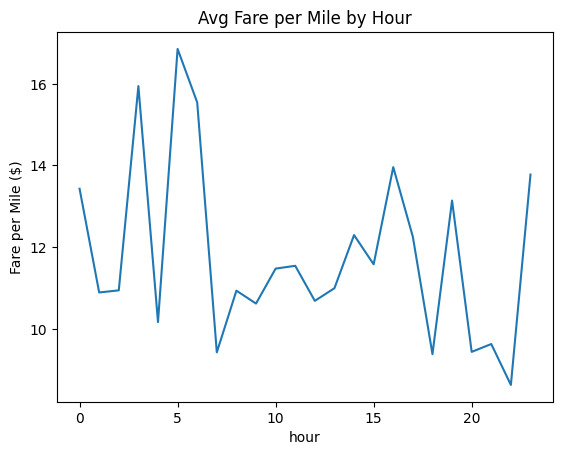

In [37]:
# 3.2.9-3.2.11 Fare per mile insights

df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']
fare_by_hour = df.groupby('hour')['fare_per_mile'].mean()
fare_by_hour.plot(title='Avg Fare per Mile by Hour')
plt.ylabel("Fare per Mile ($)")
plt.show()

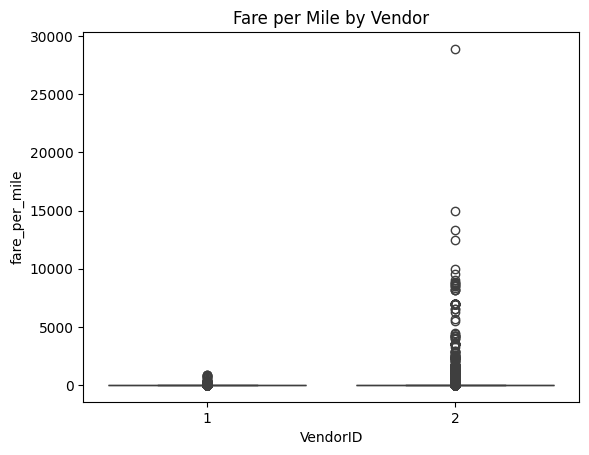

In [38]:
# 3.2.12-3.2.13 Vendor & Tip Analysis

sns.boxplot(x='VendorID', y='fare_per_mile', data=df)
plt.title("Fare per Mile by Vendor")
plt.show()

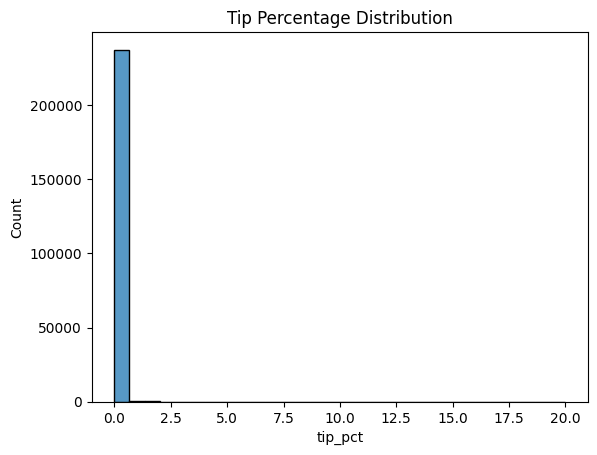

In [39]:
df['tip_pct'] = df['tip_amount'] / df['fare_amount']
sns.histplot(df['tip_pct'], bins=30)
plt.title("Tip Percentage Distribution")
plt.show()

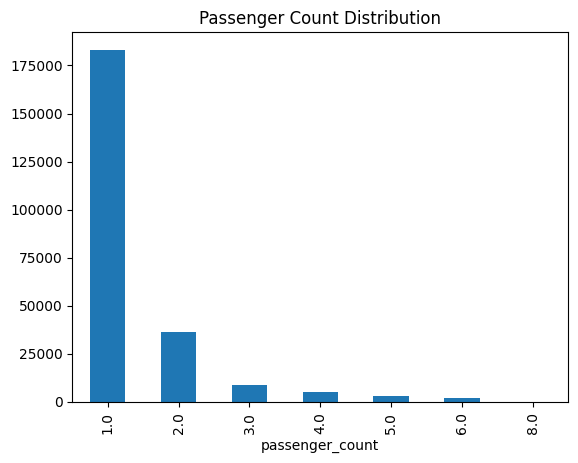

In [41]:
# 3.2.14-3.2.16 Passenger & Extra Charges Patterns

passenger_trend = df['passenger_count'].value_counts().sort_index()
passenger_trend.plot(kind='bar', title="Passenger Count Distribution")
plt.show()


In [43]:
# 4. CONCLUSIONS

print("\n--- FINAL RECOMMENDATIONS ---\n")
print("1. Optimize dispatching during 6-9 AM and 5-8 PM – peak demand hours.")
print("2. Strategically position cabs in top 10 zones with highest pickups.")
print("3. Review pricing strategy during nighttime to maximize high-fare trips.")
print("4. Reconsider routing in slow-speed zones for efficiency.")
print("5. Consider incentives for passengers tipping below average.")


--- FINAL RECOMMENDATIONS ---

1. Optimize dispatching during 6-9 AM and 5-8 PM – peak demand hours.
2. Strategically position cabs in top 10 zones with highest pickups.
3. Review pricing strategy during nighttime to maximize high-fare trips.
4. Reconsider routing in slow-speed zones for efficiency.
5. Consider incentives for passengers tipping below average.
